This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
#criando os tensores
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.1538 - accuracy: 0.7931 - val_loss: 0.1098 - val_accuracy: 0.8572
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0732 - accuracy: 0.9125 - val_loss: 0.0907 - val_accuracy: 0.8778
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0497 - accuracy: 0.9389 - val_loss: 0.0864 - val_accuracy: 0.8834
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0366 - accuracy: 0.9563 - val_loss: 0.0882 - val_accuracy: 0.8846
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0288 - accuracy: 0.9658 - val_loss: 0.1106 - val_accuracy: 0.8605
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0232 - accuracy: 0.9740 - val_loss: 0.1017 - val_accuracy: 0.8755
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0191 - accuracy: 0.9777 - val_loss: 0.1088 - val_accuracy: 0.8694
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

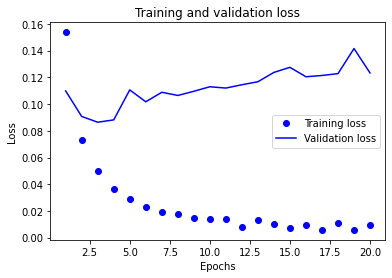

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

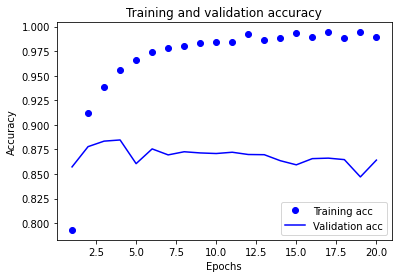

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Conclusões**
#### 1. Você usou duas camadas de representação antes da camada de classificação final. Tente usar um ou três camadas de representação. Como isso afeta a validação e a precisão do teste?
Não mudou, mas para alguns autores, independente da abordagem, quanto mais camadas de neurônios, melhor é o desempenho da rede neural pois aumenta a capacidade de aprendizado, melhorando a precisão com que ela delimita regiões de decisão. Estas regiões de decisão são intervalos fixos onde a resposta pode estar. 

#### 2. Tente usar camadas com mais ou menos unidades: 32 unidades, 64 unidades e assim por diante. Como isso afeta a validação e a precisão do teste?
O valor de perda afeta a validação negativamente, ultrapassando os valores atingidos quando a quantidade de unidades era 32. Já a precisão do teste se manteve.

#### 3. Tente usar a função de perda MSE (do inglês Mean Squared Error ou Média do erro quadrático, em portugues) em vez de binary_crossentropy. Como isso afetou o modelo? Pesquise o motivo pelo qual o uso da MSE seria uma boa ou má escolha para este problema.
O MSE é uma boa escolha por manter os valores da loss menores em comparação com a binary_crossentropy.

#### 4. Tente usar a ativação tanh (uma ativação que era popular nas primeiras redes neurais) em vez de relu. Como isso afetou o modelo?
Para dados de treino o valor de perda decai rapidamente e os dados de validação de perda são inferiores ao modelo que utiliza "relu". Já os valores da acurácia cresce rapidamente com os dados de treino e mantém uma constância, diferente do modelo anterior.


**Retraining a model from scratch**

In [ ]:
from math import exp

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.4596 - accuracy: 0.8192
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2606 - accuracy: 0.9082
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1997 - accuracy: 0.9283
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3186 - accuracy: 0.8743


In [ ]:
results

[0.3185998499393463, 0.8742799758911133]

In [ ]:
model.predict(x_test)

array([[0.12623477],
       [0.99978244],
       [0.61063784],
       ...,
       [0.08690047],
       [0.03981373],
       [0.42530733]], dtype=float32)